In [5]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def forward_euler(y,h,f,λ,t,F,F_prime):
    return y + h*f(λ,y,t,F,F_prime)

def AB2(y1,y2,h,f,λ,t1,t2,F,F_prime):
    return y1 + .5*h*(3*f(λ,y1,t1,F,F_prime) - f(λ,y2,t2,F,F_prime))

def backward_euler(y,h,λ,t,F,F_prime):
    return (y - h*(λ*F(t) - F_prime(t)))/(1-h*λ)

def AM1(y1,h,f,λ,t,t1,F,F_prime):
    return (y1 - .5*h*(λ*F(t) - F_prime(t) - f(λ,y1,t1,F,F_prime)))/(1-.5*h*λ)

def f(λ,y,t,F,F_prime):
    return λ*(y - F(t)) + F_prime(t)

def y(y_0, F, t, λ):
    return (y_0 - F(0))*np.exp(λ*t) + F(t)

In [15]:
def analysis(M,y_0,λ,F,F_prime,a,b):
    h = 10/M
    t_n = np.linspace(a,b,M+1)
    t = np.linspace(a,b,10000)
    y_t = np.zeros(len(t))
    for n in range(len(t)):
        y_t[n] = y(y_0, F, t[n], λ)
    
    # forward euler
    fwd_eul_y = np.zeros(len(t_n))
    fwd_eul_err = np.zeros(len(t_n))
    fwd_eul_y[0] = y_0
    fwd_eul_err[0] = 0
    for n in range(1,len(t_n)):
        fwd_eul_y[n] = forward_euler(fwd_eul_y[n-1],h,f,λ,t_n[n-1],F,F_prime)
        fwd_eul_err[n] = abs(fwd_eul_y[n] - y(y_0, F, t_n[n], λ))      
    fwd_eul_LTE = fwd_eul_err[1]
    fwd_eul_GE = fwd_eul_err[-1]
    fwd_eul_MGE = fwd_eul_err.max()
    
    # AB2
    AB2_y = np.zeros(len(t_n))
    AB2_err = np.zeros(len(t_n))
    AB2_y[0] = y_0
    AB2_y[1] = forward_euler(y_0,h,f,λ,t_n[0],F,F_prime) # assign missing datum with explicit one-step method
    AB2_err[0] = 0
    AB2_err[1] = abs(AB2_y[1] - y(y_0, F, t_n[1], λ))
    for n in range(2,len(t_n)):
        AB2_y[n] = AB2(AB2_y[n-1],AB2_y[n-2],h,f,λ,t_n[n-1],t_n[n-2],F,F_prime)
        AB2_err[n] = abs(AB2_y[n] - y(y_0, F, t_n[n], λ))    
    AB2_LTE = AB2_err[2] # first iteration of AB2 is actually 3rd element
    AB2_GE = AB2_err[-1]
    AB2_MGE = AB2_err.max()
    
    # backward euler
    bwd_eul_y = np.zeros(len(t_n))
    bwd_eul_err = np.zeros(len(t_n))
    bwd_eul_y[0] = y_0
    bwd_eul_err[0] = 0
    for n in range(1,len(t_n)):
        bwd_eul_y[n] = backward_euler(bwd_eul_y[n-1],h,λ,t_n[n],F,F_prime)
        bwd_eul_err[n] = abs(bwd_eul_y[n] - y(y_0, F, t_n[n], λ)) 
    bwd_eul_LTE = bwd_eul_err[1]
    bwd_eul_GE = bwd_eul_err[-1]
    bwd_eul_MGE = bwd_eul_err.max()
    
    # AM1
    AM1_y = np.zeros(len(t_n))
    AM1_err = np.zeros(len(t_n))
    AM1_y[0] = y_0
    AM1_err[0] = 0
    for n in range(1,len(t_n)):
        AM1_y[n] = AM1(AM1_y[n-1],h,f,λ,t_n[n],t_n[n-1],F,F_prime)
        AM1_err[n] = abs(AM1_y[n] - y(y_0, F, t_n[n], λ))        
    AM1_LTE = AM1_err[1]
    AM1_GE = AM1_err[-1]
    AM1_MGE = AM1_err.max()
    
    # TABLE
    dict = {'Method' : ['Forward Euler', 'AB2', 'Backward Euler', 'AM1'],
     'Local Truncation Error' : [fwd_eul_LTE, AB2_LTE, bwd_eul_LTE, AM1_LTE],
     'Global Error' : [fwd_eul_GE, AB2_GE, bwd_eul_GE, AM1_GE],
     'Maximum Global Error' : [fwd_eul_MGE, AB2_MGE, bwd_eul_MGE, AM1_MGE]}
    df = pd.DataFrame(dict)   
    
    # PLOTS
    f1, (ax1,ax2) = plt.subplots(1,2,figsize=(12.8,4.8))
    f1.suptitle('λ={}, h={}'.format(λ,b/M), fontsize=14)
    ax1.set_title('Approximations of Solution')
    ax1.plot(t_n,fwd_eul_y,label='forward euler')
    ax1.plot(t_n,AB2_y,label='AB2')
    ax1.plot(t_n,bwd_eul_y,label='backward euler')
    ax1.plot(t_n,AM1_y,label='AM1')
    ax1.plot(t,y_t,label='solution')
    ax1.set_ylabel('y(t)')
    ax1.set_xlabel('t')
    ax1.legend()
    ax2.set_title('Error')
    ax2.plot(t_n,fwd_eul_err,label='forward euler')
    ax2.plot(t_n,AB2_err,label='AB2')
    ax2.plot(t_n,bwd_eul_err,label='backward euler')
    ax2.plot(t_n,AM1_err,label='AM1')
    ax2.set_ylabel('Error')
    ax2.set_xlabel('t')
    ax2.legend()
    plt.show()
    
    return df

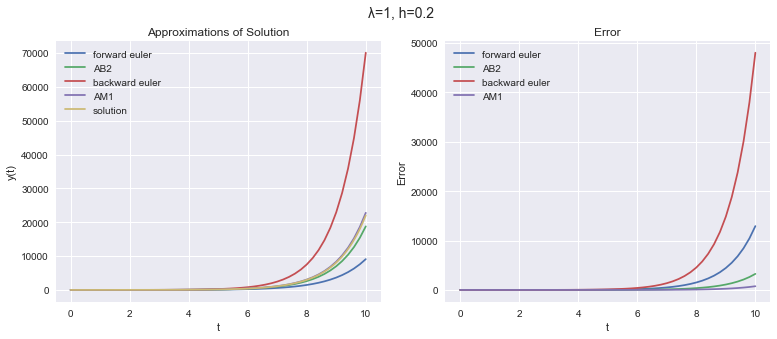

,Method,Local Truncation Error,Global Error,Maximum Global Error
0,Forward Euler,0.0214028,12926,12926
1,AB2,0.0318247,3253.94,3253.94
2,Backward Euler,0.0285972,48038.5,48038.5
3,AM1,0.000819464,751.177,751.177


In [16]:
# 0.2: F(t) = 0 and y(0) = 1, λ = ±1
y_0 = 1
a = 0
b = 10
M = 50
F = lambda t: 0
F_prime = lambda t: 0
λ = 1
# λ = -1

df = analysis(M,y_0,λ,F,F_prime,a,b)
df.style

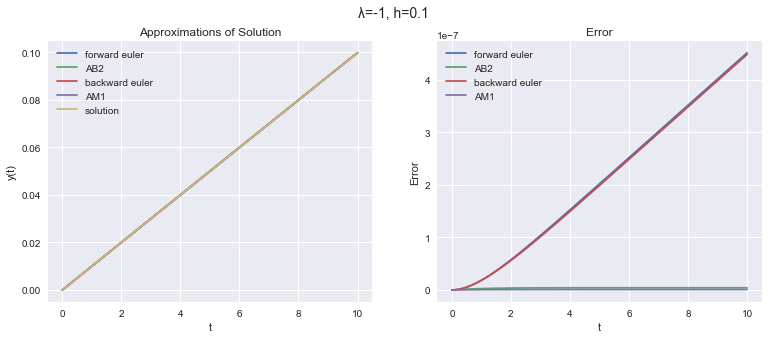

,Method,Local Truncation Error,Global Error,Maximum Global Error
0,Forward Euler,1.66667e-10,4.51035e-07,4.51035e-07
1,AB2,5.58333e-10,4.14961e-09,4.1553e-09
2,Backward Euler,3.0303e-10,4.47714e-07,4.47714e-07
3,AM1,7.93651e-11,8.29882e-10,8.3108e-10


In [11]:
# 0.3: F(t) = sin(ωt), ω = 10 and .01 and y(0) = 0, λ = -1 and -.01
y_0 = 0
a = 0
b = 10
M = 100
# ω = 10
ω = .01
λ = -1
# λ = -.01
F = lambda t: np.sin(ω*t)
F_prime = lambda t: ω*np.cos(ω*t)

df = analysis(M,y_0,λ,F,F_prime,a,b)
df.style